In [2]:
import pandas as pd
import numpy as np
import powerlaw
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(100, 0.025)
# nx.draw(er)

In [9]:
def plot_degree_distribution(G):
    hist = nx.degree_histogram(G)
        
    plt.plot(range(0, len(hist)), hist)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("#Nodes")
    plt.show()

In [ ]:
fig = plt.figure(figsize=(5, 4), dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
hist = nx.degree_histogram(G)
axes.plot(range(0, len(hist)), hist)

In [ ]:
fig=plt.figure(figsize=(20,20))
for x in range (1,6):
    y = x**n
    ax=fig.add_subplot(x,y,i+1)
    # dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

AttributeError: 'Axes' object has no attribute 'add_subplot'

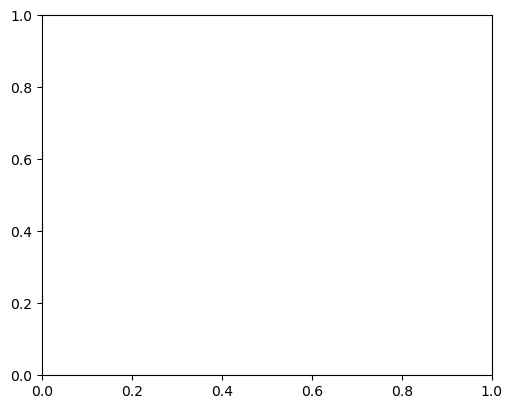

In [26]:
fig = plt.figure(figsize=(5, 4), dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
i = 0
for p in np.arange(0.025, 0.05, 0.0001):
    i = i + 1
    er = nx.erdos_renyi_graph(100, 0.025, seed=25)
    hist = nx.degree_histogram(er)
    axes.add_subplot(range(0, len(hist)), i)
    # plt.plot(range(0, len(hist)), hist)
    



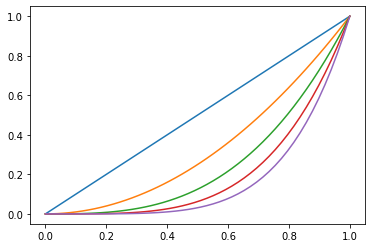

In [21]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,50)
legend_entries=[]
for n in range (1,6):
  y = x**n
  plt.plot (x,y)
  legend_entries.append('x to the'+str(n))

# plt.grid()
# plt.legend (legend_entries)
# plt.show()

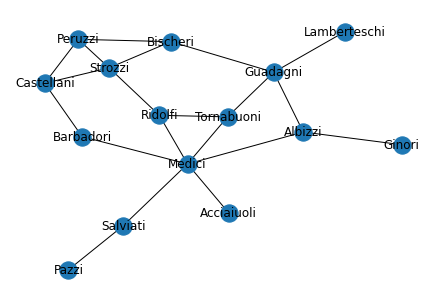

In [4]:
ff = nx.florentine_families_graph()
nx.draw(ff, with_labels=True)

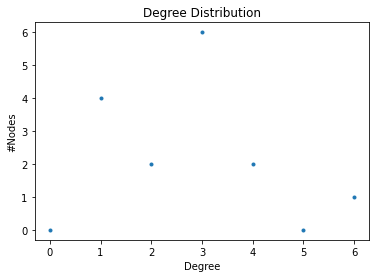

In [5]:
plot_degree_distribution(ff)

In [6]:
gg = nx.fast_gnp_random_graph(50, 0.07)

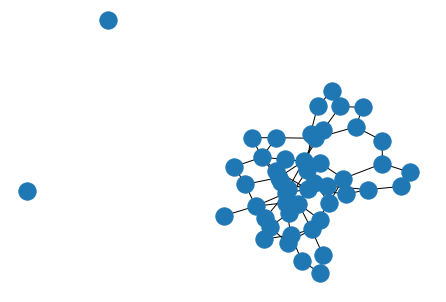

In [7]:
nx.draw(gg)

# trying out exercise from book 

`` 1.Consider the network in http://www.networkatlas.eu/exercises/ 13/1/data.txt. Generate an Erdo ̋s-Rényi graph with the same number of nodes and edges. Plot both networks’ degree CCDFs, in log-log scale. Discuss the salient differences between these distributions. ``

In [9]:
data = pd.read_csv('https://www.networkatlas.eu/exercises/13/1/data.txt', delimiter=' ', header = None)
# adding column names
data.columns = ['in', 'out']

In [10]:
data.head()

,in,out
0,2,1
1,3,1
2,3,2
3,4,1
4,4,3


In [11]:
G = nx.from_pandas_edgelist(data, 'in', 'out')

In [12]:
def graph_basic(G):
    print("Number of edges: ", G.number_of_edges())
    print("Number of nodes: ", G.number_of_nodes())

In [13]:
graph_basic(G)

Number of edges:  16631
Number of nodes:  2426


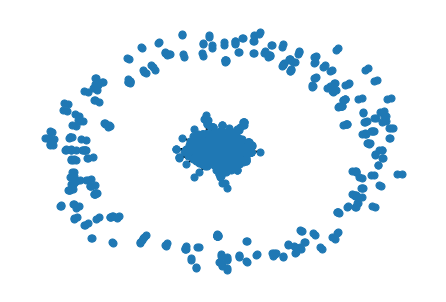

In [14]:
seed = 51
pos = nx.spring_layout(G, seed=seed)  # Seed for reproducible layout
# nx.draw(G, pos=pos)
nx.draw(G, node_size=50, width=2, pos=pos)

##  Erdo ̋s-Rényi graph
[networkx doc](https://networkx.org/documentation/stable/auto_examples/graph/plot_erdos_renyi.html?highlight=erdo%20s%20r%C3%A9nyi%20graph)

In [15]:
nodes = G.number_of_nodes()
edges = G.number_of_edges()

eg = nx.gnm_random_graph(nodes, edges, seed=seed)

In [16]:
graph_basic(eg)

Number of edges:  16631
Number of nodes:  2426


In [17]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/var/folders/cr/cspt5tz93w7cqfslq2qjbg_c0000gn/T/ipykernel_5351/717240674.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


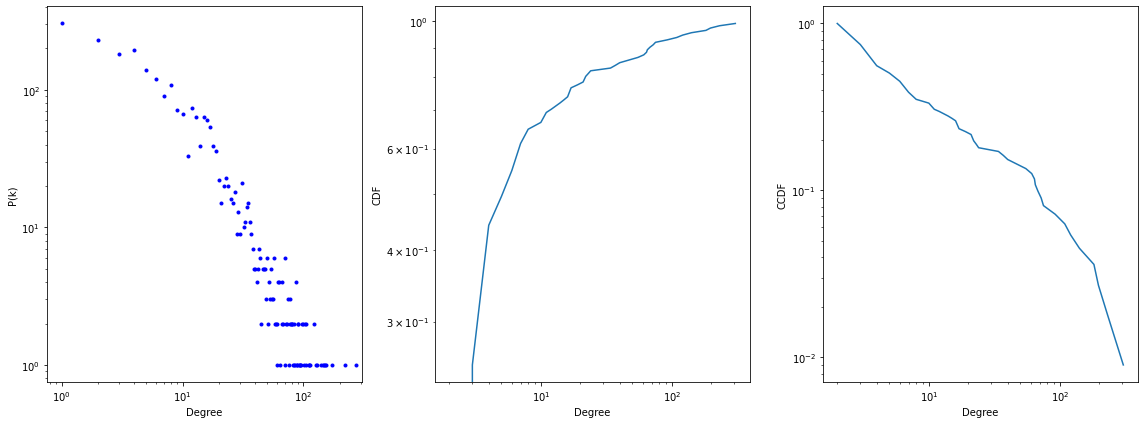

In [18]:
plot_dist(G)

Calculating best minimal value for power law fit
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
/var/folders/cr/cspt5tz93w7cqfslq2qjbg_c0000gn/T/ipykernel_5351/717240674.py:14: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


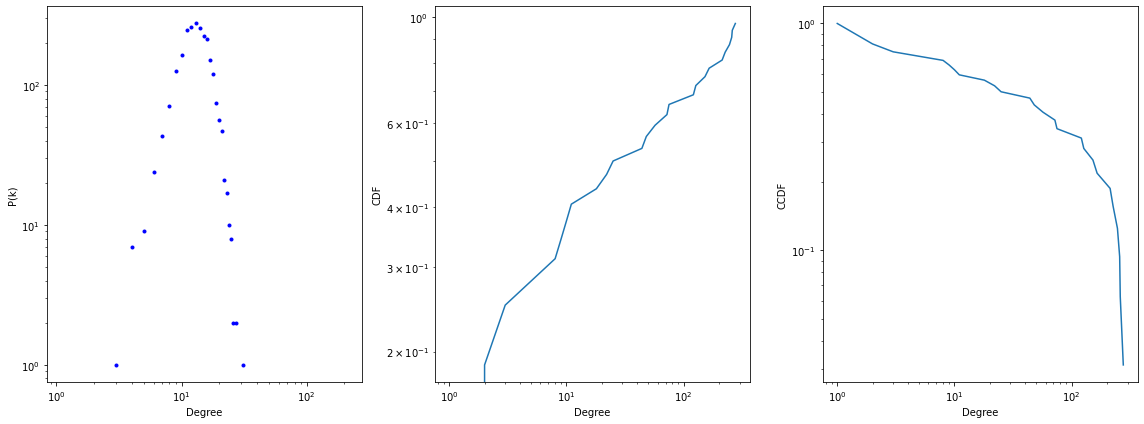

In [19]:
plot_dist(eg)

``2. Generate a series of Erdo ̋s-Rényi graphs with 1,000 nodes and an increasing p value, from .00025 to .0025, with increments of .000025. Make a plot with the p value on the x axis and the size of the largest connected component on the y axis. Can you find the phase transition? ``

In [42]:
import numpy as np

In [26]:
def end_grap(n, p, nx):
    er = nx.erdos_renyi_graph(n, p)
    largest_cc = len(max(nx.connected_components(G), key=len))
    return p, largest_cc
    

In [43]:
output_data = []
for p in np.arange(0.00025, 0.0025, 0.000025):
    p, largest_cc = end_grap(1000, p, nx)
    output_data.append(
        {
            'p': p,
            'largest_cc': largest_cc
        }
    )

In [44]:
df = pd.DataFrame(output_data)

In [45]:
df.head()

,p,largest_cc
0,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [46]:
df['len'] = df.largest_cc.apply(lambda x: len(x))

In [47]:
df.head()

,p,largest_cc,len
0,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2000
1,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2000
2,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2000
3,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2000
4,1000,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2000


In [1]:
largest_cc = max(nx.connected_components(G), key=len)

NameError: name 'nx' is not defined

In [21]:
len(largest_cc)

2000

In [22]:
nx.add_path(G, [10, 11, 12])
some = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [23]:
some[0]

2000

In [24]:
connec = nx.strongly_connected_components(G)

In [25]:
type(connec)

generator

In [37]:
output = []

for n in range(5):
        output.append({
            'name': n,
            'something': n * 2,
            'nothing': n * n

    })

In [38]:
output

[{'name': 0, 'something': 0, 'nothing': 0},
 {'name': 1, 'something': 2, 'nothing': 1},
 {'name': 2, 'something': 4, 'nothing': 4},
 {'name': 3, 'something': 6, 'nothing': 9},
 {'name': 4, 'something': 8, 'nothing': 16}]

In [34]:
import pandas as pd

In [39]:
df = pd.DataFrame(output)

In [40]:
df

,name,something,nothing
0,0,0,0
1,1,2,1
2,2,4,4
3,3,6,9
4,4,8,16
